In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
carprice=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
carprice.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carprice.shape

(205, 26)

In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
carDictionary=pd.read_excel('Data Dictionary - carprices.xlsx')

In [7]:
pd.set_option('display.max_colwidth', -1)
carDictionary

,Variable,Desc
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


In [8]:
#Checking if there is any missing data in the dataset
carprice.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
carprice['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
#Creating a new variable company from CarName and doing some spelling corrections
carprice['Company']=carprice['CarName'].apply(lambda x: x.lower().split(' ')[0])
carprice['Company']=carprice['Company'].replace({'maxda':'mazda', 'toyouta': 'toyota', 'vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche'})


In [11]:
#Dropping CarID and CarName fields

carprice.drop('car_ID',axis=1,inplace=True)
carprice.drop('CarName',axis=1,inplace=True)


In [12]:
#Convering Cylindernumber to integer

carprice['cylindernumber']=carprice['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
carprice['doornumber']=carprice['doornumber'].replace({'two':2,'four':4})

# UNIVARIATE ANALYSIS

In [13]:
carprice.nunique()

symboling           6  
fueltype            2  
aspiration          2  
doornumber          2  
carbody             5  
drivewheel          3  
enginelocation      2  
wheelbase           53 
carlength           75 
carwidth            44 
carheight           49 
curbweight          171
enginetype          7  
cylindernumber      7  
enginesize          44 
fuelsystem          8  
boreratio           38 
stroke              37 
compressionratio    32 
horsepower          59 
peakrpm             23 
citympg             29 
highwaympg          30 
price               189
Company             22 
dtype: int64

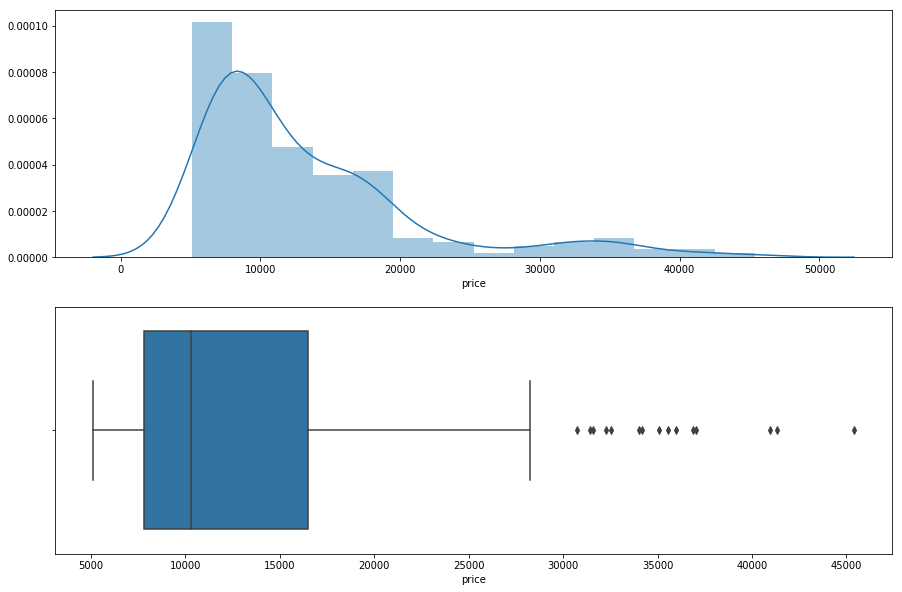

In [14]:
#Plotting the price of the our target variable 'price'
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(carprice['price'])
plt.subplot(2,1,2)
sns.boxplot(carprice['price'])

Price ranges around 5k-45k with Median around 10k

In [15]:
def display_count(ax):
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:}'.format(height), (x+width/2-0.02, y + height+0.6),)

In [16]:
carprice.nunique()

symboling           6  
fueltype            2  
aspiration          2  
doornumber          2  
carbody             5  
drivewheel          3  
enginelocation      2  
wheelbase           53 
carlength           75 
carwidth            44 
carheight           49 
curbweight          171
enginetype          7  
cylindernumber      7  
enginesize          44 
fuelsystem          8  
boreratio           38 
stroke              37 
compressionratio    32 
horsepower          59 
peakrpm             23 
citympg             29 
highwaympg          30 
price               189
Company             22 
dtype: int64

### Visualize the categorical variables: 
1. Symboling 
2. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem
10. Company

In [17]:
# plt.figure(figsize=(20,35))

# plt.subplot(5,2,1)
# sns.boxplot(carprice['symboling'],carprice['price'])

# plt.subplot(5,2,2)
# sns.boxplot(carprice['fueltype'],carprice['price'])

# plt.subplot(5,2,3)
# sns.boxplot(carprice['aspiration'],carprice['price'])

# plt.subplot(5,2,4)
# sns.boxplot(carprice['doornumber'],carprice['price'])

# plt.subplot(5,2,5)
# sns.boxplot(carprice['carbody'],carprice['price'])

# plt.subplot(5,2,6)
# sns.boxplot(carprice['drivewheel'],carprice['price'])

# plt.subplot(5,2,7)
# sns.boxplot(carprice['enginelocation'],carprice['price'])

# plt.subplot(5,2,8)
# sns.boxplot(carprice['enginetype'],carprice['price'])

# plt.subplot(5,2,9)
# sns.boxplot(carprice['cylindernumber'],carprice['price'])

# plt.subplot(5,2,10)
# sns.boxplot(carprice['fuelsystem'],carprice['price'])

In [18]:
# plt.figure(figsize=(20,10))
# sns.boxplot(carprice['Company'],carprice['price'])

In [19]:
#Using describe to look at the summary of the Numerical variables
carprice.describe()



,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [20]:
#Plotting a pairplot to see the relation between variables
#sns.pairplot(carprice)

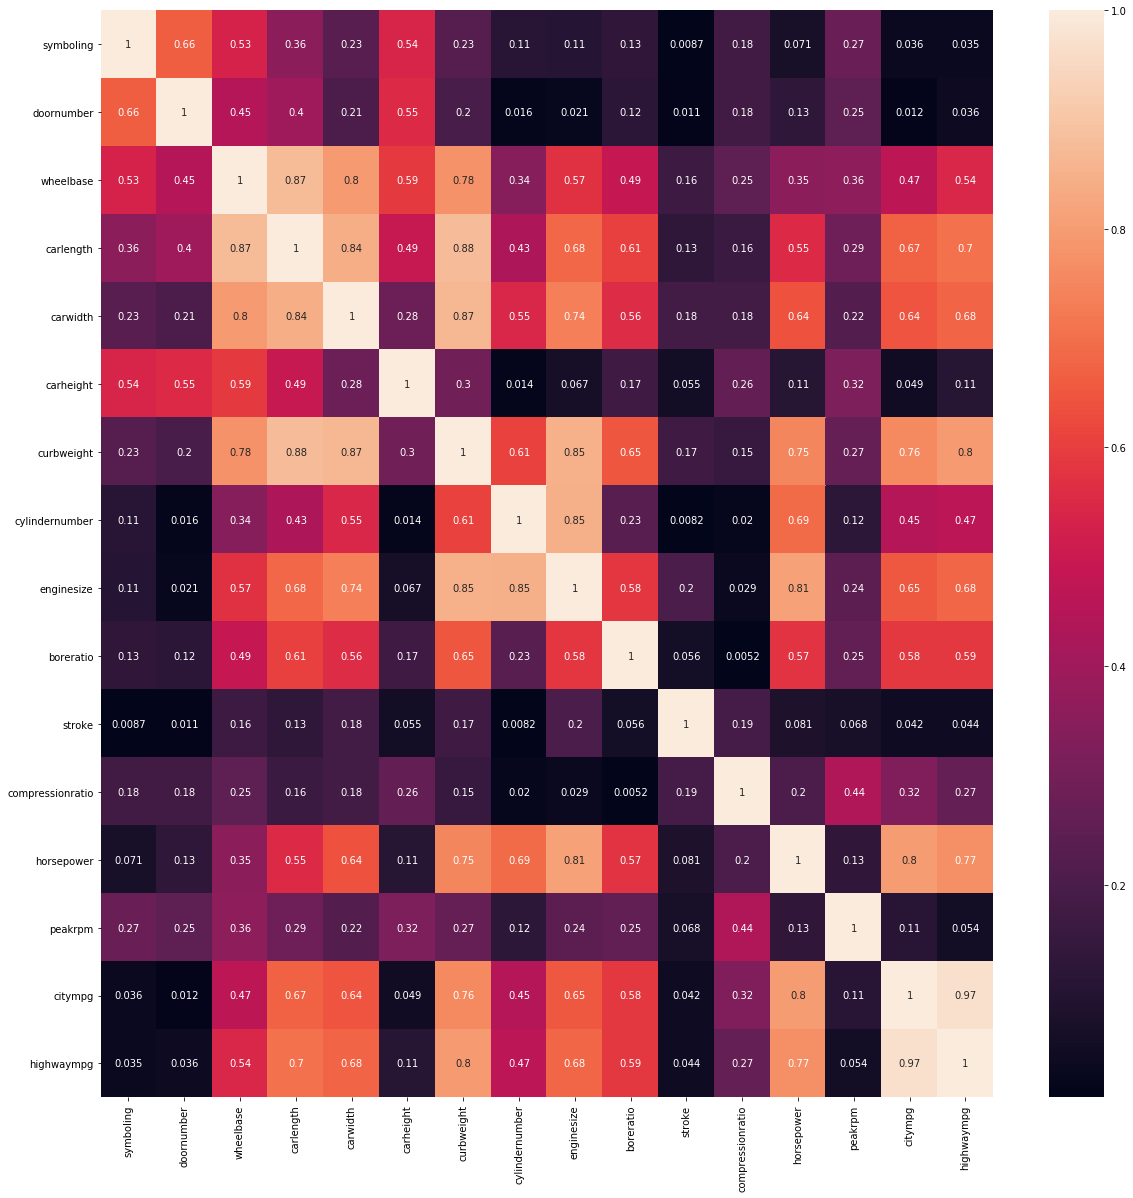

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(carprice.drop('price', axis=1).corr()),annot=True)
#Min Max Scaling of numerical columns in X_train


In [22]:
# #Dropping variable with corelation more than 0.8
# correlation_matrix = carprice.drop('price', axis=1).corr()
# i=0
# while i<len(correlation_matrix.columns):
#     for j in range(i):
#         correlation_matrix = carprice.drop('price', axis=1).corr()
#         if abs(correlation_matrix.iloc[i, j]) > 0.85:
#             colname = correlation_matrix.columns[i]
#             print("Dropped Column: "+colname+" as its corelation with "+ correlation_matrix.columns[j]+" was {:.3f}".format(correlation_matrix.iloc[i, j]))
#             carprice.drop(colname,axis=1,inplace=True)
#     i=i+1

In [23]:
#Creating dummy variables for categories with 2 unique values
varlist=['fueltype','aspiration','carbody','drivewheel','enginelocation',
        'fuelsystem','enginetype','Company']

#Label Encoder- Symboling, doornumber, cylindernumber
carprice=pd.get_dummies(carprice,columns=varlist,prefix_sep='_',drop_first=True)


In [24]:
carprice.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Splitting the data into X_train and X_test

from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(carprice, test_size=0.3, random_state=100)

In [26]:
#Checking the shape of X_train and X_test 

print(X_train.shape)
print(X_test.shape)

(143, 60)
(62, 60)


In [27]:
#Min Max Scaling of numerical columns in X_train

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

mm_scaler_list=['wheelbase','carwidth','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm',
         'highwaympg','price']

X_train[mm_scaler_list]=scaler.fit_transform(X_train[mm_scaler_list])


In [28]:
#Dividing X_test into X_test(independent variables) and y(dependent variable price)

y_train=X_train.pop('price')
X_train=X_train

In [29]:
carprice.doornumber.unique()

array([2, 4])

In [30]:
#Min Max Scaling of numerical columns in X_train

from sklearn.preprocessing import LabelEncoder
le_scaler=LabelEncoder()

le_scaler_list=['symboling','doornumber','cylindernumber']

X_train[le_scaler_list]=X_train[le_scaler_list].apply(lambda x: le_scaler.fit_transform(x))


In [31]:
#importing  LinearRegression from SKLearn and creating an object and fitting the model with all variables

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#Feature selection using RFE

from sklearn.feature_selection import RFE
rfe=RFE(lm,20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=20, step=1, verbose=0)

In [33]:
# rfe.support_

In [34]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [35]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,carwidth,horsepower,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,fuelsystem_idi,enginetype_dohcv,enginetype_l,enginetype_ohcf,Company_bmw,Company_buick,Company_jaguar,Company_peugeot,Company_porsche,Company_renault,Company_subaru
122,0.244828,0.291667,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
125,0.272414,0.666667,0.395833,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.308333,0.266667,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.068966,0.316667,0.262500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.575000,0.475000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
#Creating our first model with 20 variables from RFE

X_train_rfe=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_rfe).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.99e-67
Time:                        21:56:45   Log-Likelihood:                 220.01
No. Observations:                 143   AIC:                            -402.0
Df Residuals:                     124   BIC:                            -345.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0325      0.023      1.390      0.167      -0.014       0.079
wheelbase               0.1360      0.059      2.287      0.024       0.018       0.254
carwidth                0.3706      0.074      5.031      0.000       0.225       0.516
horsepower              0.4692      0.057      8.181      0.000       0.356       0.583
fueltype_gas           -0.0167      0.012     -1.338      0.183      -0.041       0.008
carbody_hardtop        -0.1591      0.051     -3.125      0.002      -0.260      -0.058
carbody_hatchback      -0.1712      0.032     -5.347      0.000      -0.235      -0.108
carbody_sedan          -0.1590      0.033     -4.784      0.000      -0.225      -0.093
carbody_wagon          -0.1579      0.036     -4.384      0.000      -0.229      -0.087
enginelocation_rear     0.2227      0.062      3.574      0.001       0.099       0.346
fuelsystem_idi          0.0492      0.018      2.737      0.007       0.014       0.085
enginetype_dohcv       -0.1661      0.083     -2.008      0.047      -0.330      -0.002
enginetype_l            0.1478      0.058      2.529      0.013       0.032       0.263
enginetype_ohcf         0.0972      0.031      3.098      0.002       0.035       0.159
Company_bmw             0.2922      0.027     11.023      0.000       0.240       0.345
Company_buick           0.1779      0.034      5.289      0.000       0.111       0.245
Company_jaguar          0.2472      0.039      6.369      0.000       0.170       0.324
Company_peugeot        -0.2152      0.066     -3.255      0.001      -0.346      -0.084
Company_porsche         0.1523      0.059      2.578      0.011       0.035       0.269
Company_renault        -0.0473      0.042     -1.128      0.262      -0.130       0.036
Company_subaru         -0.1255      0.034     -3.739      0.000      -0.192      -0.059
==============================================================================
Omnibus:                       41.263   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.820
Skew:                           1.009   Prob(JB):                     1.31e-32
Kurtosis:                       7.535   Cond. No.                     3.47e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
#Creating our second model after dropping carbody_sedan as it has high P value

X_train_rfe.drop('Company_renault', axis=1,inplace=True)
lr2=sm.OLS(y_train,X_train_rfe).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     117.2
Date:                Wed, 20 May 2020   Prob (F-statistic):           3.39e-68
Time:                        21:56:45   Log-Likelihood:                 219.28
No. Observations:                 143   AIC:                            -402.6
Df Residuals:                     125   BIC:                            -349.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0353      0.023      1.517      0.132      -0.011       0.081
wheelbase               0.1499      0.058      2.577      0.011       0.035       0.265
carwidth                0.3478      0.071      4.904      0.000       0.207       0.488
horsepower              0.4810      0.056      8.517      0.000       0.369       0.593
fueltype_gas           -0.0158      0.012     -1.270      0.207      -0.040       0.009
carbody_hardtop        -0.1615      0.051     -3.171      0.002      -0.262      -0.061
carbody_hatchback      -0.1737      0.032     -5.432      0.000      -0.237      -0.110
carbody_sedan          -0.1607      0.033     -4.837      0.000      -0.226      -0.095
carbody_wagon          -0.1633      0.036     -4.570      0.000      -0.234      -0.093
enginelocation_rear     0.2173      0.062      3.494      0.001       0.094       0.340
fuelsystem_idi          0.0512      0.018      2.854      0.005       0.016       0.087
enginetype_dohcv       -0.1675      0.083     -2.022      0.045      -0.331      -0.004
enginetype_l            0.1457      0.058      2.493      0.014       0.030       0.261
enginetype_ohcf         0.0955      0.031      3.043      0.003       0.033       0.158
Company_bmw             0.2899      0.026     10.957      0.000       0.238       0.342
Company_buick           0.1806      0.034      5.374      0.000       0.114       0.247
Company_jaguar          0.2450      0.039      6.314      0.000       0.168       0.322
Company_peugeot        -0.2129      0.066     -3.219      0.002      -0.344      -0.082
Company_porsche         0.1579      0.059      2.679      0.008       0.041       0.275
Company_subaru         -0.1218      0.033     -3.643      0.000      -0.188      -0.056
==============================================================================
Omnibus:                       40.372   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.592
Skew:                           0.996   Prob(JB):                     4.88e-31
Kurtosis:                       7.412   Cond. No.                     3.71e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.79e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,fuelsystem_idi,inf
4,fueltype_gas,inf
13,enginetype_ohcf,inf
9,enginelocation_rear,inf
19,Company_subaru,inf
7,carbody_sedan,12.63
17,Company_peugeot,10.60
6,carbody_hatchback,10.55
12,enginetype_l,9.24
2,carwidth,7.79


All the variables have less than 0.05 P value, so lets remove the factor with highest VIF- Company_subaru

In [39]:
#Creating our third model after dropping carbody_hatchback as it has high P value

X_train_rfe.drop('Company_subaru', axis=1,inplace=True)
lr3=sm.OLS(y_train,X_train_rfe).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     117.2
Date:                Wed, 20 May 2020   Prob (F-statistic):           3.39e-68
Time:                        21:56:45   Log-Likelihood:                 219.28
No. Observations:                 143   AIC:                            -402.6
Df Residuals:                     125   BIC:                            -349.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0353      0.023      1.517      0.132      -0.011       0.081
wheelbase               0.1499      0.058      2.577      0.011       0.035       0.265
carwidth                0.3478      0.071      4.904      0.000       0.207       0.488
horsepower              0.4810      0.056      8.517      0.000       0.369       0.593
fueltype_gas           -0.0158      0.012     -1.270      0.207      -0.040       0.009
carbody_hardtop        -0.1615      0.051     -3.171      0.002      -0.262      -0.061
carbody_hatchback      -0.1737      0.032     -5.432      0.000      -0.237      -0.110
carbody_sedan          -0.1607      0.033     -4.837      0.000      -0.226      -0.095
carbody_wagon          -0.1633      0.036     -4.570      0.000      -0.234      -0.093
enginelocation_rear     0.3392      0.095      3.577      0.000       0.152       0.527
fuelsystem_idi          0.0512      0.018      2.854      0.005       0.016       0.087
enginetype_dohcv       -0.1675      0.083     -2.022      0.045      -0.331      -0.004
enginetype_l            0.1457      0.058      2.493      0.014       0.030       0.261
enginetype_ohcf        -0.0263      0.018     -1.432      0.155      -0.063       0.010
Company_bmw             0.2899      0.026     10.957      0.000       0.238       0.342
Company_buick           0.1806      0.034      5.374      0.000       0.114       0.247
Company_jaguar          0.2450      0.039      6.314      0.000       0.168       0.322
Company_peugeot        -0.2129      0.066     -3.219      0.002      -0.344      -0.082
Company_porsche         0.1579      0.059      2.679      0.008       0.041       0.275
==============================================================================
Omnibus:                       40.372   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.592
Skew:                           0.996   Prob(JB):                     4.88e-31
Kurtosis:                       7.412   Cond. No.                     4.43e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,fueltype_gas,inf
10,fuelsystem_idi,inf
7,carbody_sedan,12.63
17,Company_peugeot,10.60
6,carbody_hatchback,10.55
12,enginetype_l,9.24
2,carwidth,7.79
8,carbody_wagon,6.74
1,wheelbase,6.52
3,horsepower,3.98


After dropping Company_subaru, VIF has decreased significantly for some variables. P value has increased now for enginetype_ohcf, lets drop this variable now to build our fourth model

In [41]:
#Creating our fourth model after dropping enginelocation_rear as it has high VIF

X_train_rfe.drop('enginetype_ohcf', axis=1,inplace=True)
lr4=sm.OLS(y_train,X_train_rfe).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           8.22e-69
Time:                        21:56:45   Log-Likelihood:                 218.11
No. Observations:                 143   AIC:                            -402.2
Df Residuals:                     126   BIC:                            -351.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0359      0.023      1.536      0.127      -0.010       0.082
wheelbase               0.1586      0.058      2.729      0.007       0.044       0.274
carwidth                0.3410      0.071      4.800      0.000       0.200       0.482
horsepower              0.4860      0.057      8.587      0.000       0.374       0.598
fueltype_gas           -0.0165      0.012     -1.320      0.189      -0.041       0.008
carbody_hardtop        -0.1628      0.051     -3.185      0.002      -0.264      -0.062
carbody_hatchback      -0.1758      0.032     -5.481      0.000      -0.239      -0.112
carbody_sedan          -0.1650      0.033     -4.963      0.000      -0.231      -0.099
carbody_wagon          -0.1712      0.035     -4.831      0.000      -0.241      -0.101
enginelocation_rear     0.3104      0.093      3.336      0.001       0.126       0.495
fuelsystem_idi          0.0524      0.018      2.916      0.004       0.017       0.088
enginetype_dohcv       -0.1694      0.083     -2.037      0.044      -0.334      -0.005
enginetype_l            0.1474      0.059      2.511      0.013       0.031       0.264
Company_bmw             0.2910      0.027     10.953      0.000       0.238       0.344
Company_buick           0.1809      0.034      5.362      0.000       0.114       0.248
Company_jaguar          0.2447      0.039      6.280      0.000       0.168       0.322
Company_peugeot        -0.2135      0.066     -3.213      0.002      -0.345      -0.082
Company_porsche         0.1603      0.059      2.709      0.008       0.043       0.277
==============================================================================
Omnibus:                       39.709   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.073
Skew:                           1.002   Prob(JB):                     9.38e-29
Kurtosis:                       7.201   Cond. No.                     4.48e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,fueltype_gas,inf
10,fuelsystem_idi,inf
7,carbody_sedan,12.53
16,Company_peugeot,10.60
6,carbody_hatchback,10.53
12,enginetype_l,9.24
2,carwidth,7.76
8,carbody_wagon,6.58
1,wheelbase,6.45
3,horsepower,3.96


P-value is now lower than 0.05 for all variables. On checking VIF, we can identify that carbody has a high VIF(11.57), lets drop this variable and validate if on dropping the variable, our R square adjusted drops or not.

In [43]:
#Creating our fifth model after dropping enginetype_ohcf as it has high VIF

X_train_rfe.drop('fueltype_gas', axis=1,inplace=True)
lr5=sm.OLS(y_train,X_train_rfe).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           8.22e-69
Time:                        21:56:46   Log-Likelihood:                 218.11
No. Observations:                 143   AIC:                            -402.2
Df Residuals:                     126   BIC:                            -351.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0194      0.033      0.590      0.556      -0.046       0.085
wheelbase               0.1586      0.058      2.729      0.007       0.044       0.274
carwidth                0.3410      0.071      4.800      0.000       0.200       0.482
horsepower              0.4860      0.057      8.587      0.000       0.374       0.598
carbody_hardtop        -0.1628      0.051     -3.185      0.002      -0.264      -0.062
carbody_hatchback      -0.1758      0.032     -5.481      0.000      -0.239      -0.112
carbody_sedan          -0.1650      0.033     -4.963      0.000      -0.231      -0.099
carbody_wagon          -0.1712      0.035     -4.831      0.000      -0.241      -0.101
enginelocation_rear     0.3104      0.093      3.336      0.001       0.126       0.495
fuelsystem_idi          0.0689      0.020      3.398      0.001       0.029       0.109
enginetype_dohcv       -0.1694      0.083     -2.037      0.044      -0.334      -0.005
enginetype_l            0.1474      0.059      2.511      0.013       0.031       0.264
Company_bmw             0.2910      0.027     10.953      0.000       0.238       0.344
Company_buick           0.1809      0.034      5.362      0.000       0.114       0.248
Company_jaguar          0.2447      0.039      6.280      0.000       0.168       0.322
Company_peugeot        -0.2135      0.066     -3.213      0.002      -0.345      -0.082
Company_porsche         0.1603      0.059      2.709      0.008       0.043       0.277
==============================================================================
Omnibus:                       39.709   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.073
Skew:                           1.002   Prob(JB):                     9.38e-29
Kurtosis:                       7.201   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.28
6,carbody_sedan,12.53
15,Company_peugeot,10.60
5,carbody_hatchback,10.53
11,enginetype_l,9.24
2,carwidth,7.76
7,carbody_wagon,6.58
1,wheelbase,6.45
3,horsepower,3.96
16,Company_porsche,3.27


Dropping carbody_sedan has given us mixed result, at one side it has decreased VIF of variable and on the other, P-value of few variables has increases. Lets drop the variable 'carbody_hardtop' and validate if it can help us reduce p value and VIF of variables.

In [45]:
#Creating our sixth model after dropping carbody_hardtop as it has high P value

X_train_rfe.drop('carbody_sedan', axis=1,inplace=True)
lr6=sm.OLS(y_train,X_train_rfe).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     109.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           5.42e-65
Time:                        21:56:46   Log-Likelihood:                 205.35
No. Observations:                 143   AIC:                            -378.7
Df Residuals:                     127   BIC:                            -331.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1165      0.020     -5.852      0.000      -0.156      -0.077
wheelbase               0.0472      0.058      0.808      0.421      -0.068       0.163
carwidth                0.3793      0.077      4.931      0.000       0.227       0.532
horsepower              0.5202      0.061      8.503      0.000       0.399       0.641
carbody_hardtop        -0.0083      0.044     -0.188      0.851      -0.096       0.079
carbody_hatchback      -0.0273      0.013     -2.170      0.032      -0.052      -0.002
carbody_wagon          -0.0123      0.017     -0.743      0.459      -0.045       0.020
enginelocation_rear     0.2865      0.101      2.831      0.005       0.086       0.487
fuelsystem_idi          0.0645      0.022      2.922      0.004       0.021       0.108
enginetype_dohcv       -0.1878      0.090     -2.077      0.040      -0.367      -0.009
enginetype_l            0.1418      0.064      2.219      0.028       0.015       0.268
Company_bmw             0.2934      0.029     10.144      0.000       0.236       0.351
Company_buick           0.2306      0.035      6.572      0.000       0.161       0.300
Company_jaguar          0.2499      0.042      5.892      0.000       0.166       0.334
Company_peugeot        -0.1749      0.072     -2.434      0.016      -0.317      -0.033
Company_porsche         0.1391      0.064      2.164      0.032       0.012       0.266
==============================================================================
Omnibus:                       33.012   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.003
Skew:                           0.967   Prob(JB):                     1.40e-16
Kurtosis:                       5.918   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.18
14,Company_peugeot,10.45
10,enginetype_l,9.23
2,carwidth,7.67
1,wheelbase,5.48
3,horsepower,3.90
15,Company_porsche,3.25
7,enginelocation_rear,2.73
9,enginetype_dohcv,2.18
12,Company_buick,1.59


On dropping 'carbody_hardtop', our adjusted R square has just dropped by 0.001, lets drop 'carbody_wagon' since it has a high P value.

In [47]:
#Creating our seventh model after dropping horsepower as it has high P value

X_train_rfe.drop('carbody_hardtop', axis=1,inplace=True)
lr7=sm.OLS(y_train,X_train_rfe).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     118.3
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.97e-66
Time:                        21:56:46   Log-Likelihood:                 205.33
No. Observations:                 143   AIC:                            -380.7
Df Residuals:                     128   BIC:                            -336.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1170      0.020     -5.959      0.000      -0.156      -0.078
wheelbase               0.0467      0.058      0.803      0.423      -0.068       0.162
carwidth                0.3805      0.076      4.984      0.000       0.229       0.532
horsepower              0.5196      0.061      8.537      0.000       0.399       0.640
carbody_hatchback      -0.0270      0.012     -2.172      0.032      -0.052      -0.002
carbody_wagon          -0.0120      0.016     -0.731      0.466      -0.044       0.020
enginelocation_rear     0.2789      0.092      3.016      0.003       0.096       0.462
fuelsystem_idi          0.0646      0.022      2.939      0.004       0.021       0.108
enginetype_dohcv       -0.1878      0.090     -2.084      0.039      -0.366      -0.010
enginetype_l            0.1420      0.064      2.231      0.027       0.016       0.268
Company_bmw             0.2938      0.029     10.222      0.000       0.237       0.351
Company_buick           0.2305      0.035      6.596      0.000       0.161       0.300
Company_jaguar          0.2503      0.042      5.927      0.000       0.167       0.334
Company_peugeot        -0.1750      0.072     -2.446      0.016      -0.317      -0.033
Company_porsche         0.1389      0.064      2.169      0.032       0.012       0.266
==============================================================================
Omnibus:                       33.110   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.222
Skew:                           0.970   Prob(JB):                     1.26e-16
Kurtosis:                       5.920   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.89
13,Company_peugeot,10.45
9,enginetype_l,9.23
2,carwidth,7.61
1,wheelbase,5.47
3,horsepower,3.89
14,Company_porsche,3.25
6,enginelocation_rear,2.29
8,enginetype_dohcv,2.18
11,Company_buick,1.59


"Horsepower" has a high VIF, lets drop the variable and check P values and VIF of the remaining variables.

In [49]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('carbody_wagon', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 20 May 2020   Prob (F-statistic):           5.61e-67
Time:                        21:56:46   Log-Likelihood:                 205.03
No. Observations:                 143   AIC:                            -382.1
Df Residuals:                     129   BIC:                            -340.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1201      0.019     -6.282      0.000      -0.158      -0.082
wheelbase               0.0385      0.057      0.676      0.500      -0.074       0.151
carwidth                0.3902      0.075      5.197      0.000       0.242       0.539
horsepower              0.5170      0.061      8.524      0.000       0.397       0.637
carbody_hatchback      -0.0247      0.012     -2.057      0.042      -0.048      -0.001
enginelocation_rear     0.2832      0.092      3.074      0.003       0.101       0.465
fuelsystem_idi          0.0663      0.022      3.037      0.003       0.023       0.109
enginetype_dohcv       -0.1884      0.090     -2.094      0.038      -0.366      -0.010
enginetype_l            0.1433      0.064      2.256      0.026       0.018       0.269
Company_bmw             0.2975      0.028     10.538      0.000       0.242       0.353
Company_buick           0.2292      0.035      6.578      0.000       0.160       0.298
Company_jaguar          0.2538      0.042      6.060      0.000       0.171       0.337
Company_peugeot        -0.1778      0.071     -2.492      0.014      -0.319      -0.037
Company_porsche         0.1365      0.064      2.138      0.034       0.010       0.263
==============================================================================
Omnibus:                       33.643   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.526
Skew:                           0.991   Prob(JB):                     1.08e-16
Kurtosis:                       5.900   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.18
12,Company_peugeot,10.42
8,enginetype_l,9.22
2,carwidth,7.39
1,wheelbase,5.27
3,horsepower,3.88
13,Company_porsche,3.24
5,enginelocation_rear,2.28
7,enginetype_dohcv,2.18
10,Company_buick,1.59


In [51]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('wheelbase', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     139.0
Date:                Wed, 20 May 2020   Prob (F-statistic):           5.83e-68
Time:                        21:56:46   Log-Likelihood:                 204.78
No. Observations:                 143   AIC:                            -383.6
Df Residuals:                     130   BIC:                            -345.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1186      0.019     -6.259      0.000      -0.156      -0.081
carwidth                0.4245      0.055      7.703      0.000       0.316       0.534
horsepower              0.5091      0.059      8.571      0.000       0.392       0.627
carbody_hatchback      -0.0263      0.012     -2.239      0.027      -0.049      -0.003
enginelocation_rear     0.2865      0.092      3.121      0.002       0.105       0.468
fuelsystem_idi          0.0676      0.022      3.118      0.002       0.025       0.110
enginetype_dohcv       -0.1899      0.090     -2.116      0.036      -0.367      -0.012
enginetype_l            0.1458      0.063      2.304      0.023       0.021       0.271
Company_bmw             0.3030      0.027     11.230      0.000       0.250       0.356
Company_buick           0.2299      0.035      6.614      0.000       0.161       0.299
Company_jaguar          0.2600      0.041      6.376      0.000       0.179       0.341
Company_peugeot        -0.1724      0.071     -2.437      0.016      -0.312      -0.032
Company_porsche         0.1272      0.062      2.045      0.043       0.004       0.250
==============================================================================
Omnibus:                       31.621   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.332
Skew:                           0.948   Prob(JB):                     3.95e-15
Kurtosis:                       5.745   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('Company_peugeot', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           8.44e-68
Time:                        21:56:46   Log-Likelihood:                 201.58
No. Observations:                 143   AIC:                            -379.2
Df Residuals:                     131   BIC:                            -343.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1045      0.018     -5.685      0.000      -0.141      -0.068
carwidth                0.3815      0.053      7.174      0.000       0.276       0.487
horsepower              0.5239      0.060      8.704      0.000       0.405       0.643
carbody_hatchback      -0.0236      0.012     -1.981      0.050      -0.047   -3.17e-05
enginelocation_rear     0.2734      0.093      2.929      0.004       0.089       0.458
fuelsystem_idi          0.0642      0.022      2.912      0.004       0.021       0.108
enginetype_dohcv       -0.1845      0.091     -2.019      0.046      -0.365      -0.004
enginetype_l            0.0025      0.024      0.105      0.917      -0.045       0.050
Company_bmw             0.3063      0.027     11.155      0.000       0.252       0.361
Company_buick           0.2504      0.034      7.290      0.000       0.182       0.318
Company_jaguar          0.2708      0.041      6.557      0.000       0.189       0.352
Company_porsche         0.1333      0.063      2.105      0.037       0.008       0.259
==============================================================================
Omnibus:                       33.277   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.472
Skew:                           1.008   Prob(JB):                     1.35e-15
Kurtosis:                       5.726   Cond. No.                         29.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.68
2,horsepower,3.70
1,carwidth,3.59
11,Company_porsche,3.09
4,enginelocation_rear,2.27
6,enginetype_dohcv,2.18
5,fuelsystem_idi,1.51
9,Company_buick,1.49
10,Company_jaguar,1.31
7,enginetype_l,1.25


In [54]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('enginetype_l', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           6.50e-69
Time:                        21:56:46   Log-Likelihood:                 201.58
No. Observations:                 143   AIC:                            -381.2
Df Residuals:                     132   BIC:                            -348.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1048      0.018     -5.791      0.000      -0.141      -0.069
carwidth                0.3829      0.051      7.475      0.000       0.282       0.484
horsepower              0.5231      0.059      8.799      0.000       0.405       0.641
carbody_hatchback      -0.0236      0.012     -1.994      0.048      -0.047      -0.000
enginelocation_rear     0.2740      0.093      2.951      0.004       0.090       0.458
fuelsystem_idi          0.0647      0.021      3.031      0.003       0.022       0.107
enginetype_dohcv       -0.1844      0.091     -2.026      0.045      -0.365      -0.004
Company_bmw             0.3061      0.027     11.207      0.000       0.252       0.360
Company_buick           0.2494      0.033      7.576      0.000       0.184       0.315
Company_jaguar          0.2705      0.041      6.591      0.000       0.189       0.352
Company_porsche         0.1330      0.063      2.110      0.037       0.008       0.258
==============================================================================
Omnibus:                       33.269   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.254
Skew:                           1.009   Prob(JB):                     1.51e-15
Kurtosis:                       5.717   Cond. No.                         29.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.38
2,horsepower,3.63
1,carwidth,3.35
10,Company_porsche,3.08
4,enginelocation_rear,2.26
6,enginetype_dohcv,2.18
5,fuelsystem_idi,1.42
8,Company_buick,1.38
9,Company_jaguar,1.31
3,carbody_hatchback,1.19


In [56]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('Company_porsche', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.22e-69
Time:                        21:56:46   Log-Likelihood:                 199.21
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     133   BIC:                            -348.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1101      0.018     -6.067      0.000      -0.146      -0.074
carwidth                0.3938      0.052      7.627      0.000       0.292       0.496
horsepower              0.5260      0.060      8.738      0.000       0.407       0.645
carbody_hatchback      -0.0203      0.012     -1.710      0.090      -0.044       0.003
enginelocation_rear     0.4061      0.069      5.850      0.000       0.269       0.543
fuelsystem_idi          0.0635      0.022      2.937      0.004       0.021       0.106
enginetype_dohcv       -0.0632      0.072     -0.883      0.379      -0.205       0.078
Company_bmw             0.3046      0.028     11.013      0.000       0.250       0.359
Company_buick           0.2448      0.033      7.358      0.000       0.179       0.311
Company_jaguar          0.2652      0.041      6.392      0.000       0.183       0.347
==============================================================================
Omnibus:                       31.182   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.802
Skew:                           0.993   Prob(JB):                     2.81e-13
Kurtosis:                       5.400   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.14
2,horsepower,3.63
1,carwidth,3.32
5,fuelsystem_idi,1.42
8,Company_buick,1.38
6,enginetype_dohcv,1.31
9,Company_jaguar,1.30
4,enginelocation_rear,1.23
3,carbody_hatchback,1.17
7,Company_bmw,1.13


In [58]:
varlist=list(X_train_rfe.columns[1:,])
varlist

['carwidth',
 'horsepower',
 'carbody_hatchback',
 'enginelocation_rear',
 'fuelsystem_idi',
 'enginetype_dohcv',
 'Company_bmw',
 'Company_buick',
 'Company_jaguar']

In [59]:
y_train_predict=lr8.predict(X_train_rfe)

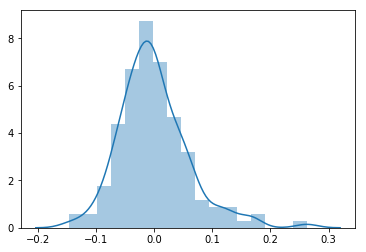

In [60]:
#Residual analysis
sns.distplot(y_train-y_train_predict)

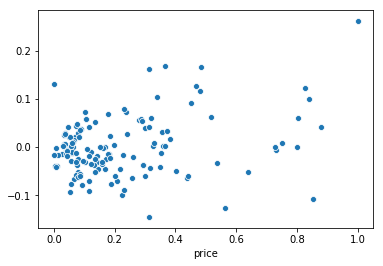

In [61]:
sns.scatterplot(y_train,y_train-y_train_predict)

In [62]:
X_test_rfe.head()

NameError: name 'X_test_rfe' is not defined

In [63]:
X_test.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
160,0,4,95.7,166.3,64.4,53.0,2094,4,98,3.19,...,0,0,0,0,0,0,0,1,0,0
186,2,4,97.3,171.7,65.5,55.7,2275,4,109,3.19,...,0,0,0,0,0,0,0,0,1,0
59,1,2,98.8,177.8,66.5,53.7,2385,4,122,3.39,...,0,0,0,0,0,0,0,0,0,0
165,1,2,94.5,168.7,64.0,52.6,2265,4,98,3.24,...,0,0,0,0,0,0,0,1,0,0
140,2,2,93.3,157.3,63.8,55.7,2240,4,108,3.62,...,0,0,0,0,0,0,1,0,0,0


In [64]:
X_test_rfe=X_test.copy()

In [65]:
#Min Max Scaling of numerical columns in X_test

X_test_rfe[mm_scaler_list]=scaler.transform(X_test_rfe[mm_scaler_list])
X_test_rfe[le_scaler_list]=X_test_rfe[le_scaler_list].apply(lambda x: le_scaler.fit_transform(x))

In [66]:
#Transforming X_test for model prediction and creating y_test

varlist=list(X_train_rfe.columns[1:,])
y_test_rfe=X_test_rfe.pop('price')
X_test_rfe=X_test_rfe[varlist]


In [67]:
X_test_rfe=sm.add_constant(X_test_rfe)
y_test_predict=lr8.predict(X_test_rfe)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test_rfe,y_test_predict)

0.9047447399752311

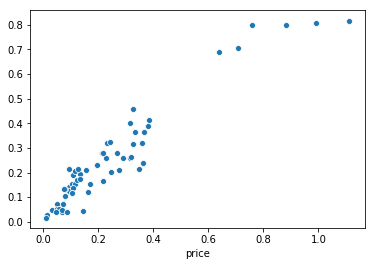

In [69]:
sns.scatterplot(y_test_rfe,y_test_predict)

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_rfe,y_test_predict)

0.005091225512086842

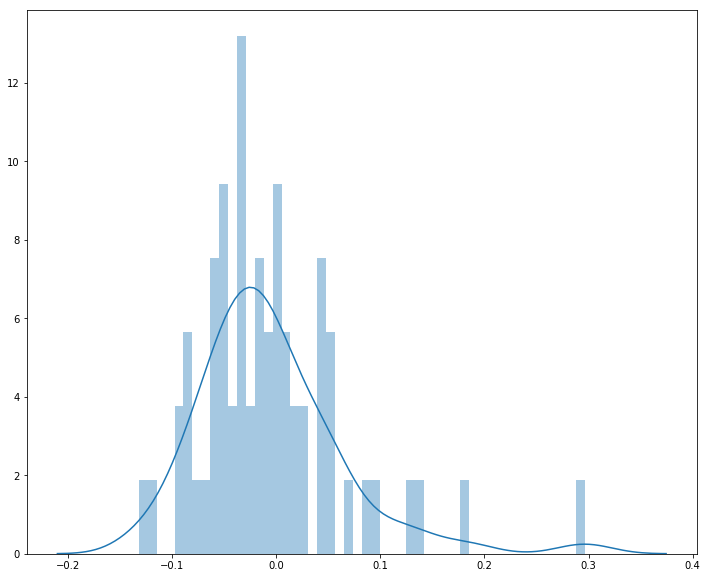

In [72]:
plt.figure(figsize=(12,10))
sns.distplot(y_test_rfe-y_test_predict,bins=50)